# Task_2: To explore Supervised Machine Learning using Linear Regression

### Introduction

This notebook is created to explore supervised machine learning using a linear regression model.  
In this linear regression model, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.  

### Problem Statement

What will be predicted score if a student study for 9.25 hrs in a day?

### The Dataset

Data can be found at : http://bit.ly/w-data

## Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [88]:
data = pd.read_csv('http://bit.ly/w-data')

## Analysing Data

In [89]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [90]:
data.shape

(25, 2)

In [91]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [92]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Visualizing Data

#### Univariate Analysis

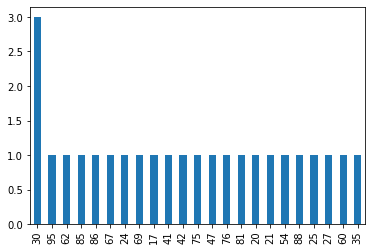

In [93]:
data['Scores'].value_counts().plot(kind = 'bar')

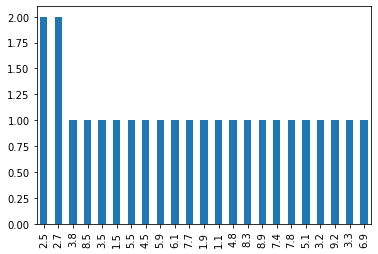

In [94]:
data['Hours'].value_counts().plot(kind = 'bar')

#### Bivariate Analysis

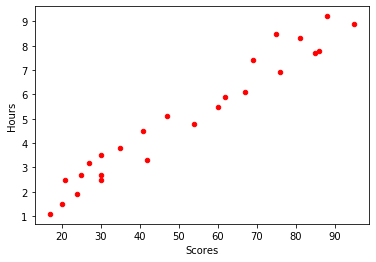

In [95]:
data.plot.scatter('Scores','Hours', c='red')

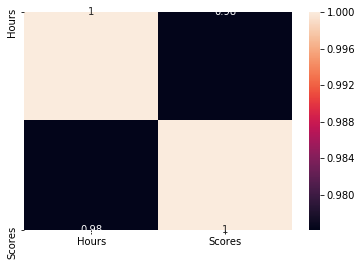

In [96]:
relation = data.corr()
sns.heatmap(relation, annot=True) 
plt.show()

## Feature Selection

In [97]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

## Splitting Data

In [98]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Creating and Training Model

In [99]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualizing Model

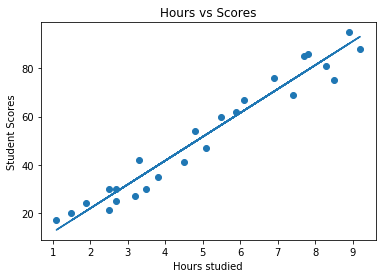

In [100]:
# Plotting the regression line
line = lr.coef_ * X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.xlabel('Hours studied') 
plt.ylabel('Student Scores') 
plt.title('Hours vs Scores')
plt.plot(X, line);
plt.show()

## Predicting Results

In [101]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Results

In [102]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Evaluating Model

In [103]:
print(f'The train score:  {lr.score(X_train,y_train)}')
print(f'The test score:   {lr.score(X_test,y_test)}')

The train score:  0.9515510725211553
The test score:   0.9454906892105356


In [104]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
